In [12]:
import matplotlib.pyplot as plt
from skimage import io
import pafy
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import requests
from io import BytesIO

In [3]:
model = load_model('model.h5')

In [33]:
video_url = "https://www.youtube.com/watch?v=2_ZbslLnshw"

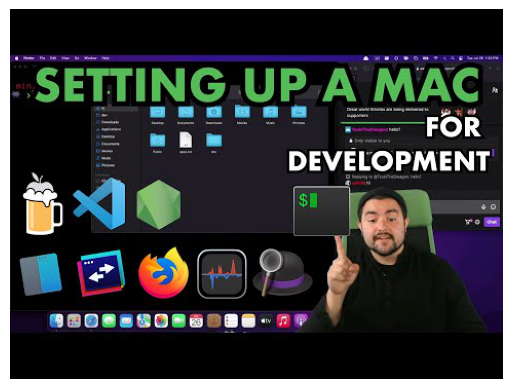

In [34]:
video = pafy.new(video_url)
thumbnail_url = video.bigthumbhd
response = requests.get(thumbnail_url)
image = Image.open(BytesIO(response.content))

plt.axis("off")
plt.imshow(image)
plt.show()

In [35]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [36]:
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

/var/folders/s5/646w4w2138dc2vcjprq0hywm0000gn/T/ipykernel_1074/1059440533.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


In [37]:
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [38]:
prediction = model.predict(data)

1/1 [==============================] - 0s 29ms/step


In [39]:
if prediction[0][0] >= 0.5:
    print("The thumbnail is educational.")
else:
    print("The thumbnail is not educational.")

The thumbnail is educational.
